# 독립 표본 t-검정 (이표본 검정; Independent Two Sample T-Test)
- 서로 다른 2개의 그룹 간 `평균의 차이`가 유의미한지 여부 판단

## 1. 작업 준비
#### 패키지 참조

In [1]:
import seaborn as sb
from scipy import stats
from pandas import read_excel
from matplotlib import pyplot as plt

## 2. (예제1) - 지혈제 효과 비교
#### 데이터 가져오기
- 두 종류의 지혈제 효과를 측정한 자료이다
- 실험 참여 총 14명, 두 그룹으로 임의 분할한 후 피부에 작은 상처를 내어 피가 흐르게 한 후, 한 그룹에는 지혈제 B를, 다른 그룹에는 지혈제 G를 투여하여 완전히 지혈될 때 까지의 시간(분)을 측정하였다

In [3]:
df = read_excel("https://data.hossam.kr/E02/styptic.xlsx")
df

,B,G
0,8.80,9.9
1,8.40,9.0
2,7.90,11.1
3,8.70,9.6
4,9.10,8.7
5,9.60,10.4
6,8.75,9.5


#### 1) 두 그룹의 분산 확인

In [4]:
var1 = df['B'].var()
var2 = df['G'].var()
var1, var2

(0.2824999999999997, 0.6695238095238097)

#### 2) 커널 밀도 그래프
- 두 그룹에 데이터 분포가 서로 다름이 확인됨

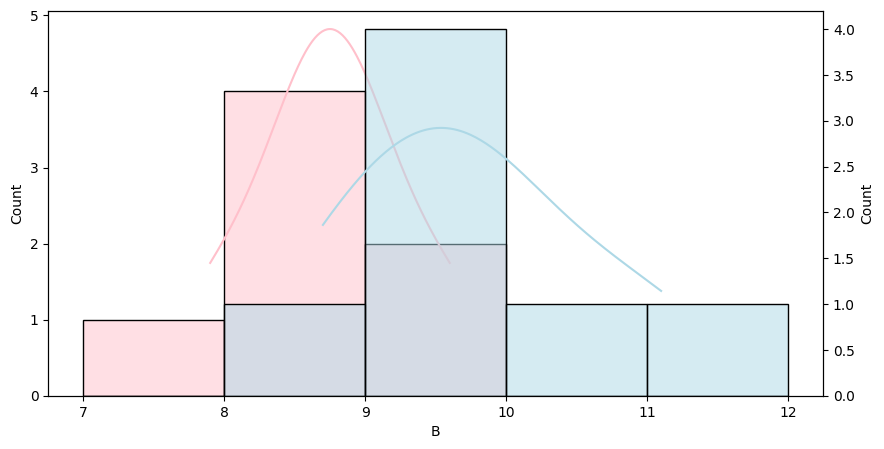

In [5]:
bins = [7, 8, 9, 10, 11, 12]

fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
ax2 = ax1.twinx()
sb.histplot(data=df, x='B', bins=bins, kde=True, ax=ax1, color='pink')
sb.histplot(data=df, x='G', bins=bins, kde=True, ax=ax2, color='lightblue')
plt.show()
plt.close()

#### 3) T-Test 시행
##### case 1
- 가설:
    - 귀무가설: B를 사용한 그룹과 G를 사용한 그룹의 지형 시간에는 차이가 없다
    - 대립가설: B를 사용한 그룹과 G를 사용한 그룹의 지혈 시간에는 차이가 있다
- 두 그룹 간 평균에 차이가 있는지를 검정
- 기본 파라미터 사용시 `equal_var = True`, `alternative = 'two-sided'`으로 설정됨

In [6]:
stats.ttest_ind(df['B'], df['G'])

TtestResult(statistic=-2.69222826574718, pvalue=0.019588953351304183, df=12.0)

- 결과 해석:
    - `p-value`가 0.05보다 작으므로 (P < 0.05) 지혈제 B를 사용한 그룹과 지혈제 G를 사용한 그룹 간 평균 지혈시간에는 차이가 있다

##### case 2 - 공통 분산이 아님을 가정
- `equal_var = False` 설정

In [7]:
stats.ttest_ind(df['B'], df['G'], equal_var=False, alternative='two-sided')

TtestResult(statistic=-2.69222826574718, pvalue=0.022077570616415278, df=10.29809053849377)

- 결과 해석:
    - `p-value`가 0.05보다 작으므로 (P < 0.05) 지혈제 B를 사용한 그룹과 지혈제 G를 사용한 그룹 간 평균 지혈시간에는 차이가 있다

##### case 3
- 가설:
    - 귀무가설: 지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 `크지 않다`
    - 대립가설: 지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 `크다`
- `alternative = 'greater'`

In [8]:
stats.ttest_ind(df['B'], df['G'], equal_var=False, alternative='greater')

TtestResult(statistic=-2.69222826574718, pvalue=0.9889612146917923, df=10.29809053849377)

- 결과 해석:
    - `p-value`가 0.05보다 크므로(P > 0.05) 지혈제 B를 사용한 그룹의 평균 지혈 시간은 지혈제 G를 사용한 그룹의 평균 지혈시간보다 크지 않다

##### case 4
- 가설:
    - 귀무가설: 지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 작지 않다
    - 대립가설: 지혈제 B를 사용한 그룹의 평균 지혈시간은 G를 사용한 그룹의 평균 지혈시간보다 작다
- `alternative = 'less'`

In [9]:
stats.ttest_ind(df['B'], df['G'], equal_var=False, alternative='less')

TtestResult(statistic=-2.69222826574718, pvalue=0.011038785308207639, df=10.29809053849377)

- 결과 해석:
    - `p-value`가 0.05보다 작으므로(P < 0.05) 지혈제 B를 사용한 그룹의 평균 지혈 시간은 지혈제 G를 사용한 그룹의 평균 지혈시간보다 작다

## 3. (예제2) - 인공심장 효과 측정

#### 데이터 가져오기
- 자료는 두 독립적인 그룹의 심장병 환자에 대한 심장계수(cardiac index)를 측정한 것
- 그룹 1: 심장수술을 받고 부착한 인공장기의 기능이 정상적인 사람들
- 그룹 2: 비정상으로 판명된 사람들
- 심장계수는 수술 직후에 측정함
- 이 두 그룹의 환자에게 부착한 인공장기의 기능에 따라 심장계수가 서로 차이가 나는지 알고 싶은 것이 이 실험의 목적
- (단, 두 그룹은 공통분산 가정에 어긋난다고 가정함)

In [10]:
df = read_excel("https://data.hossam.kr/E02/heatrate.xlsx")
df

,그룹1,그룹2
0,3.84,3.97
1,2.60,2.50
2,1.19,2.70
3,2.00,3.36
4,6.20,3.55
5,0.96,2.97
6,5.50,3.20
7,3.18,2.30


##### case 1
- 두 그룹 간 심장계수의 차이가 있는지를 검정
- 가설:
    - 귀무가설: 두 그룹 간 심장계수에는 차이가 없다
    - 대립가설: 두 그룹 간 심장계수에는 차이가 있다

In [11]:
stats.ttest_ind(df['그룹1'], df['그룹2'], equal_var=False, alternative='two-sided')

TtestResult(statistic=0.16333115041045673, pvalue=0.8742117697901691, df=8.19961125071249)

- 결과 해석:
    - `p-value`가 0.05보다 크므로(P > 0.05) 귀무가설을 기각할 수 없다
    - 두 그룹의 심장계수가 같지 않다고 판단할 근거가 될 수 없다

##### case 2
- 가설:
    - 귀무가설: 그룹1의 심장계수가 그룹2의 심장계수보다 작지 않다
    - 대립가설: 그룹1의 심장계수가 그룹2의 심장계수보다 작다
- `alternative = 'less'`

In [12]:
stats.ttest_ind(df['그룹1'], df['그룹2'], equal_var=False, alternative='less')

TtestResult(statistic=0.16333115041045673, pvalue=0.5628941151049154, df=8.19961125071249)

- 결과 해석:
    - `p-value`가 0.05보다 크므로(P > 0.05) 귀무가설을 기각할 수 없다
##### case 3
- 가설:
    - 귀무가설: 그룹1의 심장계수가 그룹2의 심장계수보다 크지 않다
    - 대립가설: 그룹1의 심장계수가 그룹2의 심장계수보다 크다
- `alternative = 'greater'`


In [13]:
stats.ttest_ind(df['그룹1'], df['그룹2'], equal_var=False, alternative='greater')

TtestResult(statistic=0.16333115041045673, pvalue=0.43710588489508456, df=8.19961125071249)

- 결과 해석:
    - `p-value`가 0.05보다 크므로(P > 0.05) 귀무가설을 기각할 수 없다